In [1]:
import IPython
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

In [2]:
bird1_path = ('../samples/Rec - Bird 1 - Cut.wav')
bird2_path = ('../samples/Rec - Bird 2 - Cut.wav')
bird3_path = ('../samples/Rec - Bird 3 - Cut.wav')

# Spectrograms Applied to Birdsong


Name: Ross Monaghan 

Student ID: G00376556

Institution: Galway Mayo Institute of Technology

Course: B.Eng (Hons) in Software and Electronic Engineering

Module: Digital Signal Processing


<div>
<img src="../images/bird-1361326.jpg" width="400"/>
</div>

### Signal (noun) [1]

1. - Sign, Indication


2. - An act, event, or watchword that has been agreed on as the occasion of concerted action.
   - Something that incites to action.
   

3. - Something (such as a sound, gesture, or object) that conveys notice or warning.


4. - An object used to transmit or convey information beyond the range of human voice.
   - The sound or image conveyed in telegraphy, telephony, radio, radar, or television.
   - A detectable physical quantity or impulse (such as a voltage, current, or magnetic field strength) by which messages or information can be transmitted.

## Signals:

Though there are many definitions of a signal, all are linked by one factor. That is, a signal is the transmission of information between that signals source and its recipient(s). 

The sound heard from a radio can be thought of as a signal, with the radio transmitting information to a listener via sound (mechanical) waves. Equally, the radio itself receives signals from each broadcaster via radio (electromagnetic) waves. Signals are ever-present in the world we live in, with humans and animals alike continuously transmitting and receiving countless signals every day.

But what are signals composed of and, importantly, what is it about signals that allows them to be used to so effectively transmit information? The answer lies in the properties of waves, more specifically in the fact that all signals can be represented via some sort of waveform [2]. This fact makes it possible to identify different signals based on properties such as a signals amplitude and its component frequencies.

Take for example, birdsong. Though to a human listener, birdsong may seem like indecipherable (albeit pleasant) chatter, there is of course an underlying function to these sounds. Birds are able to communicate messages with each other by varying the pitch (frequency) and volume (amplitude) of the sounds they make [3]. 

This may be heard in action in the recordings below:

In [3]:
IPython.display.Audio(bird1_path)

In [4]:
IPython.display.Audio(bird2_path)

In [5]:
IPython.display.Audio(bird3_path)

The above recordings contain the calls of several birds, each of which can be distinguished from one another by the human ear. The ear however is limited in the information that it can gather from a birdsong. It is not possible to gain a clear idea of the frequencies that a birdsong is composed of just by listening to it. The result is that unless you are a seasoned birder, it will be extremely difficult to actually identify the finer qualities of a birdsong based solely on what you hear.

What then, is the alternative? Recalling points made previously, each bird song in the above recording can be thought of as a signal and may be represented by a waveform. There is a fundamental property of waveforms that allows them to be decomposed into their component frequencies. The property being referred to is the fact that all waveforms, no matter how complex, are nothing more than the summation of simple sinusoids of varying frequencies and phase[2]. How then, can this property be used to represent birdsong in a way that will provide much more information than by simply listening? The answer is via the use of the Discrete Fourier Transform, which will be used to create a spectrogram, that is, a visual representation of the above recording.  

## The Discrete Fourier Transform (DFT):

The Discrete Fourier Transform (DFT) is a mathematical transform that is used to convert a finite signal that is represented in the time or spatial domain, into that signals representation in the frequency domain. In essence, the DFT is capable of decomposing any finite signal that varies with time into its component frequencies, while also deducing the magnitude and phase of each frequency that is present in the signal. It is 'one of the most common, and powerful, procedures encountered in the field of digital signal processing' [4].

As the name suggests, the 'Discrete' Fourier Transform relies on taking discrete samples of a continuous signal, at a constant frequency. In order to ensure accuracy and avoid an issue known as aliasing, the frequency chosen to sample a signal must be at least twice the highest frequency of the signal being sampled, this is known as the Nyquist Criterion [4]. Once a suitable sampling frequency has been calculated, each sample of the signal will be a value equalling that signals magnitude in that point in time. The number of samples taken will be determined by the sampling frequency multiplied by how long the sampling lasts for. Take for example the signal below, of a 3Hz sinusoid sampled at 8Hz for 1 second:

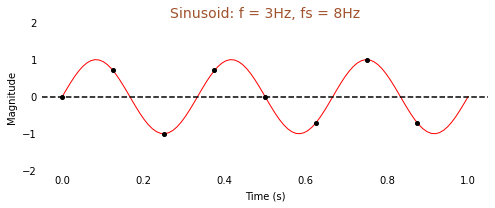

In [6]:
freq = 3
duration = 1
fs = 8
N = int(duration*fs)
n = np.arange(0, duration*fs)
nT = n/fs
t = np.linspace(0, duration, num=100, endpoint=True)

signal_cont = np.sin(2*np.pi*freq*t) 
signal_disc = np.sin(2*np.pi*freq/fs*n)

# Plotting the signal in the time domain
fig = plt.figure(figsize = (8, 6))
fig = fig.add_subplot(2, 1, 1)

fig.plot(t, signal_cont, color='r', linewidth=1)
fig.plot(nT, signal_disc, color='k', linestyle='', marker='o', markersize=4)

plt.axhline(y=0, color='k', linestyle='--')

fig.set_yticks([-2, -1, 0, 1, 2])
fig.tick_params(axis='both', which='both', labelsize=10, length=0, pad=5)
fig.set_xlabel('Time (s)', fontsize=10, labelpad=5)
fig.set_ylabel('Magnitude', fontsize=10, labelpad=5)
fig.set_title('Sinusoid: f = 3Hz, fs = 8Hz', fontsize=14, color='sienna', pad=5)

fig.spines['top'].set_color('none')
fig.spines['bottom'].set_color('none')
fig.spines['left'].set_color('none')
fig.spines['right'].set_color('none')

######  Note: In the above diagram there are 8 discrete samples (represented as black dots), all of which have a magnitude associated with them. Their values from n=0 to n=7 are as follows: [0, 0.707, -1, 0.707, 0, -0.707, 1, -0.707].

Recalling from the section on signals, that every signal is nothing more than the summation of sinusoids, the output of the DFT will be a vector of frequency bins, with a magnitude assigned to each bin representing the amount of that frequency that is present in the signal. This output vector is of equal length to the number of input samples, with the resolution of each bin being equal to the sampling frequency divided by the number of samples taken [4]. In the above example of 8 samples taken at 8Hz, the resolution will be 8/8 or 1Hz between bins. It would therefore be reasonable to expect that for a 3Hz sinusoid as in the example above, the only output bin that will have a magnitude will be the one that represents 3Hz as seen in the example below.

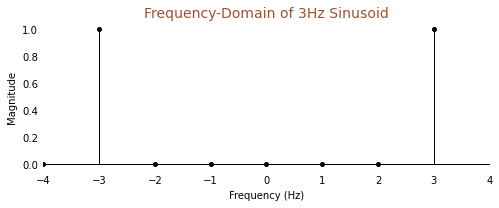

In [7]:
y = np.fft.fft(signal_disc)
y_abs = np.abs(y)

freqs = np.fft.fftfreq(N, 1/fs)

# Plotting the signal in the frequency domain
fig = plt.figure(figsize = (8, 6))
fig = fig.add_subplot(2, 1, 1)

markerlines, stemlines, baseline = fig.stem(freqs, y_abs/(fs/2), use_line_collection=True)

plt.setp(stemlines, color='k', linewidth=1)
plt.axhline(y=0, color='k', linewidth=1)
plt.setp(baseline, color='k', linewidth=1)
plt.setp(markerlines, color='k', markersize=4)

fig.tick_params(axis='both', which='both', labelsize=10, length=0, pad=5)
fig.set_xlabel('Frequency (Hz)', fontsize=10, labelpad=5)
fig.set_ylabel('Magnitude', fontsize=10, labelpad=5)
fig.set_title('Frequency-Domain of 3Hz Sinusoid', fontsize=14, color='sienna', pad=5)
fig.set_xlim(-fs//2, fs//2)

fig.spines['top'].set_color('none')
fig.spines['bottom'].set_color('none')
fig.spines['left'].set_color('none')
fig.spines['right'].set_color('none')

###### Note: The negative frequency may be ignored as a duplication of information.

How is this output achieved however? To answer this an examination of the DFT equation is needed.

### The DFT Equation:

$$\Large{X(m) = \sum_{n=0}^{N-1}x(n)e^{-j\frac{2\pi nm}{N}}}$$

The equation above is of the Discrete Fourier Transform in its exponential form. The output of a frequency bin at index m is equal to the summation of all of the input samples, each of which are multiplied by a complex exponential before summing. The result will be a value with a real and imaginary part. Using Pythogras' Theorem, the real and imaginary part are then used to calculate the magnitude of the frequency bin at index m, thereby revealing its contribution to the signal that was sampled. A description of the elements of the equation are contained below:

- $m$: The index of the output vector.
- $X(m)$: The output value at index m.
- $n$: The index of the input sample vector.
- $x(n)$: The value of the sample at index n.
- $N$: The number of samples in the input vector, and the number of samples in the Discrete Fourier Transform.
- $e$: Euler's number, an irrational constant roughly equalling 2.71828.
- $j$: Imaginary unit, equal to $\sqrt{-1}$.

It is however common to convert the exponential form of the DFT equation into its rectangular form using Euler's Formula, which states that: $e^{jx} = (\cos(x) + j\sin(x))$. In the case of the DFT, the $x$ in Euler's Formula will be replaced by $2 \pi nm/{N}$, resulting in a more manageable equation as seen below [4]:

$$\Large{X(m) = \sum_{n=0}^{N-1}x(n)[\cos(2\pi nm/N)-j\sin(2\pi nm/N)]}$$

###### Note: the DFT exponential is to the power of -j, this is reflected in the sign change above.

Applying the rectangular form of the DFT to the details of the 3Hz sinusoid described previously, we can sub in the following values:
- Input Vector = [0, 0.707, -1, 0.707, 0, -0.707, 1, -0.707]
- $N$ = 8

These values can be used to calculate the magnitude at each frequency bin, however as it is known that the signal is a 3Hz sinusoid, for brevity the focus in this case will be on the frequency bin at $m$ = 3, as it represents 3Hz. The resulting equation snippet is as follows:

 - $X(3) = 0[\cos\frac{2\pi*0*3}{8}-j\sin\frac{2\pi*0*3}{8}] + 0.707[\cos\frac{2\pi*1*3}{8}-j\sin\frac{2\pi*1*3}{8}] -1[\cos\frac{2\pi*2*3}{8}-j\sin\frac{2\pi*2*3}{8}] ... -0.707[\cos\frac{2\pi*7*3}{8}-j\sin\frac{2\pi*7*3}{8}]$

Which can be broken down to:

 - $X(3) = 0 - 0j + 0.707 - 0.029j -1 + 0.082j ... - 0.677 - 0.2j$


Summing the real and imaginary parts will give:

 - $X(3) = 0-4j$


Now that the real and imaginary parts have been obtained, all that is left to do is calculate the magnitude of this bin via the use of Pythagoras' Theorem:

 - $|X(3)| = \sqrt{0^2-4^2} = 4$


As stated previously, the magnitude value for this bin is equal to that frequency's contribution to the sampled signal. If normalization of the result is required, all that needs to be done is to divide the resulting magnitude by half the number of samples, which in this case is 4/4, or 1.

Though the Discrete Fourier Transform is the basis of many digital signal processing tasks, it is not the full story and will not provide data which is usable in a spectrogram. In order to accurately capture the component frequencies of a complex signal such as a birdsong, a similar transform, the Short Time Fourier Transform is necessary. How though, does the Short Time Fourier Transform work and how is it used to create a spectrogram? To understand this, it is important to firstly understand what exactly a spectrogram is and what is it that makes spectrograms so useful in analysing birdsong.

## Spectrograms:

In [8]:
def plot_spec_scipy(path, title='Spectrogram', window='hann', nperseg=1024, overlap=100):
    
    rate, audio = wavfile.read(path)
    
    noverlap = nperseg-overlap
    freqs_sp, times_sp, spec_sp = signal.spectrogram(audio, fs=rate, window=window,
                                                     nperseg=nperseg, noverlap=noverlap,
                                                     detrend=False, scaling='spectrum')
    
    spec_db_sp = 10*np.log10(spec_sp)
    fig, ax = plt.subplots(figsize=(7,5))
    im = ax.pcolormesh(times_sp, freqs_sp/1000, spec_db_sp, vmax=spec_db_sp.max(), vmin=0, cmap=plt.cm.gist_yarg, linewidth=10)
    cb = fig.colorbar(im, ax=ax, orientation="horizontal")
    ax.set_ylabel('Frequency (kHz)', fontsize=10, labelpad=5)
    ax.set_xlabel('Time (s)', fontsize=10, labelpad=5);
    ax.set_title(title , fontsize=14, pad=5, color='sienna');
    ax.set_ylim(0, 10)
    ax.tick_params(axis='both', which='both', labelsize=8, length=0, pad=5)
    cb.set_label('Power (dB)', fontsize=10, labelpad=5)
    cb.ax.tick_params(labelsize=8, pad=5)

Of the many methods in which signals may be represented visually, spectrograms are among the most effective. A spectrogram is, in essence, a three-dimensional graph of whatever frequencies make up a signal, with respect to time. The amplitude of those frequencies give a spectrogram its 'third' dimension [5].

When applied to audio signals, spectrograms provide a clear (possibly intuitive) visualisation of whatever signal is being analysed. Lower frequency sounds appear further down on the frequency axis, higher frequencies further up, with their loudness (amplitude) represented by their contrast against the background. It is their ability to represent three dimensions of data, combined with the readability of the data represented that makes spectrograms so useful, not only to birders, but in many applications such as; radar, speech processing and seismology [5].

Contained in the figures below are spectrograms of the bird recordings heard previously:

### Bird 1:

In [9]:
IPython.display.Audio(bird1_path)

<ipython-input-8-d62e69fc9ebc>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read(path)


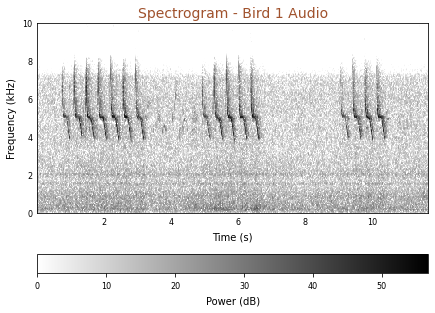

In [10]:
plot_spec_scipy(bird1_path, title='Spectrogram - Bird 1 Audio')

The spectrogram displayed above has clearly defined 'chirps', represented by the darkened and almost vertical repeating lines. Paying attention to what is being represented on both the x and y axes, it would be reasonable to deduce that these chirps begin at a high frequency and then descend into lower frequencies as time progresses. This is in fact exactly how the birds chirps behave in the audio recording and it is even be possible to count the number of chirps on the spectrogram and compare it to the recording, the result will be the same!

### Bird 2:

In [11]:
IPython.display.Audio(bird2_path)

<ipython-input-8-d62e69fc9ebc>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read(path)


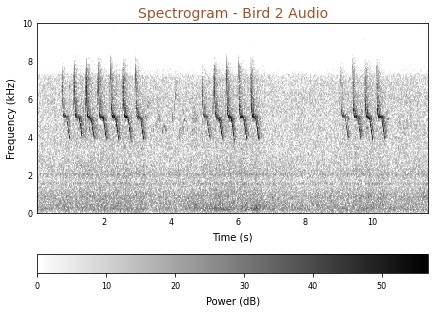

In [12]:
plot_spec_scipy(bird2_path, title='Spectrogram - Bird 2 Audio')

This spectrogram is interesting in that the audio recording which it is representing actually contains the songs of multiple birds. Paying attention to the 3KHz - 5KHz range, there three groupings of birdsong that stand out as darkest among the rest. With the knowledge that frequencies of higher amplitude are represented as darker against the background, it clear that these groupings will be the loudest elements in the recording. Present on the spectrogram are also more faint signals which can be seen in the 6KHz - 8KHz range and the 4KHZ - 7KHz range. Listening back to the recording, it is clear that these correspond to birds that are calling slightly further off in the distance, hence the lesser amplitude.

### Bird 3:

In [13]:
IPython.display.Audio(bird3_path)

<ipython-input-8-d62e69fc9ebc>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read(path)


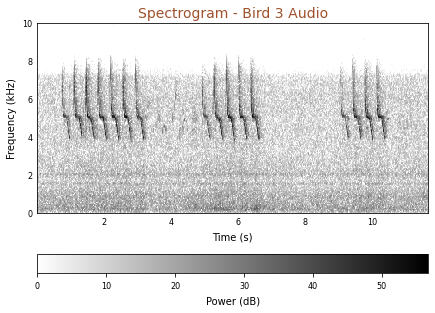

In [14]:
plot_spec_scipy(bird3_path, title='Spectrogram - Bird 3 Audio')

The final spectrogram displays three thick columns that are present from lower frequencies of less than 1KHz, all the way to higher frequencies of about 8KHz. This corresponds to the quite harsh call that can be heard in the recording and is noteworthy because of how distinct it is from the previous recordings whose calls were much more pleasant and 'whistle-like', largely due to their thinner presence on the frequency spectrum.

It is clear from the above examples that spectrograms are a tool that provide extremely clear information about a signal being analysed. The question remains however as to how they are created. Though there are several ways in which creating a spectrogram can be achieved, one such method has already been mentioned in the previous sections. The Discrete Fourier Transform, more specifically an extension of the DFT called the Short Time Fourier Transform is a common method of creating spectrograms in digital signal processing and is what will be focused on in this case.

## Creating Spectrograms:

Though the Discrete Fourier Transform is extremely useful in converting a signal from its representation in the time domain into its representation in the frequency domain, this very property makes it unsuitable for creating spectrograms. This is due to the fact that spectrograms represent their data in the frequency **and** time domains. The question then is how do we keep the data that is gathered from the DFT, but represent it in a way that is with respect to time. One answer could be by segmenting the signal being analysed into short periods of time, and then carrying out the DFT on each of these segments. What results would be the frequency domain of each segment being analysed. Each result could then be plotted in sequence, creating a graph that contains both time and frequency domain information.

### The Short Time Fourier Transform (STFT):

The procedure described previously is in essence what is taking place with the Short Time Fourier Transform. That is to say, instead of performing the DFT on the entire signal being analysed, the STFT applies a windowing function to a portion of the signal and performs the DFT on that portion, the signal then moves forward in its time domain and the process is repeated. The STFT will return bins of time as well as bins of frequencies and their amplitudes. It is the data that is present in the output of the STFT that is used to plot all three dimensions of a spectrogram.

$$\Large{X[t, m] = \sum_{n=0}^{L-1}x[n+t]w[n]e^{-j\frac{2\pi nm}{N}}}$$

The above equation is of the Short Time Fourier Transform performed on a discrete input signal $x$. It is clear that the equation is quite similar to that of the DFT, but is different in that it multiplies each input sample by a sample of a windowing function $w$, before performing the DFT on what results. The STFT requires that the magnitudes of its results be squared in order to be used to create a spectrogram.

A list of all the elements in the equation is contained below:

- $t$: The index of the time bin.
- $m$: The index of the frequency bin.
- $L$: The length of the segment.
- $n$: The index of the window.
- $N$: The length of the Fourier Transform.


- $X[m, n]$: The output value of frequency $m$ and time $t$.
- $x[n+t]$: The value of the sample at index $n+t$.
- $w[n]$: A The window function value at index $n$.
- $e^{-j\frac{2\pi nm}{N}}$: The complex exponential that will return real and complex values associated with a frequency.

### Windowing Function:

The windowing function chosen for use in the STFT can have a large effect on the signal to which it is applied and therefore can have a large effect on the spectrogram that is created. The examples below show comparisons of the effects of different windowing functions on a discrete input signal, and on a spectrogram:

In [15]:
f1 = 2
f2 = 6
f3 = 6
f4 = 8
fs = 20

duration = 1

N = int(duration*fs)
n = np.arange(0, duration*fs)   
nT = n/fs
t = np.linspace(0, duration, num=100, endpoint=True)

s_cont = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t) + np.sin(2*np.pi*f4*t)      
s_disc = np.sin(2*np.pi*f1/fs*n) + np.sin(2*np.pi*f2/fs*n) + np.sin(2*np.pi*f3/fs*n) + np.sin(2*np.pi*f4/fs*n)

win_size = fs

In [16]:
def plot_disc_signal(signal, title):
    fig = plt.figure(figsize = (7, 5))
    fig = fig.add_subplot(2, 1, 1)
    plt.axhline(y=0, color='k', linestyle='-')
    
    points, stemlines, baseline = plt.stem(nT, signal, use_line_collection=True)
    
    fig.tick_params(axis='both', which='both', labelsize=10, length=0, pad=5)
    
    fig.set_xlim(0, 1)
    fig.set_yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
    fig.set_xlabel('Time (s)', fontsize=10, labelpad=5)
    fig.set_ylabel('Magnitude', fontsize=10, labelpad=5)
    
    plt.setp(stemlines, color='k', linewidth=1)
    plt.setp(baseline, color='k', linewidth=1, linestyle='-')
    plt.setp(points, color='k', markersize=3)
    
    fig.spines['top'].set_color('none')
    fig.spines['bottom'].set_color('none')
    fig.spines['left'].set_color('none')
    fig.spines['right'].set_color('none')
    fig.set_title(title, fontsize=14, color='sienna', pad=5)

In [17]:
def plot_window(window, size, title):
    fig = plt.figure(figsize = (7, 5))
    fig = fig.add_subplot(2, 1, 1)
    
    locs = np.arange(0, size) 
    
    points, stemlines, baseline = plt.stem(locs, window, use_line_collection=True)
    
    plt.setp(stemlines, color='k', linewidth=1)
    plt.setp(baseline, color='k', linewidth=1)
    plt.setp(points, color='k', markersize=3)
    
    fig.spines['top'].set_color('none')
    fig.spines['bottom'].set_color('none')
    fig.spines['left'].set_color('none')
    fig.spines['right'].set_color('none')
    
    plt.title(title, fontsize=14, color='sienna', pad=5)
    plt.ylabel("Amplitude", fontsize=10, labelpad=5)
    plt.xlabel("Sample Number", fontsize=10, labelpad=5)
    fig.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

**Rectangular Window:** Each sample in the input signal is multiplied by 1, this has no effect on the signal.


<ipython-input-8-d62e69fc9ebc>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read(path)
<ipython-input-8-d62e69fc9ebc>:10: RuntimeWarning: divide by zero encountered in log10
  spec_db_sp = 10*np.log10(spec_sp)


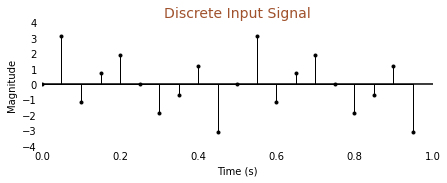

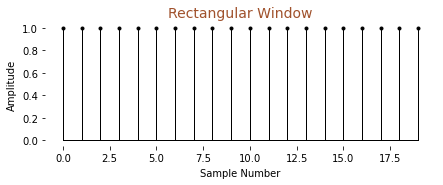

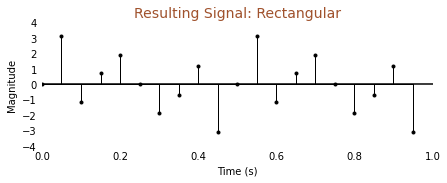

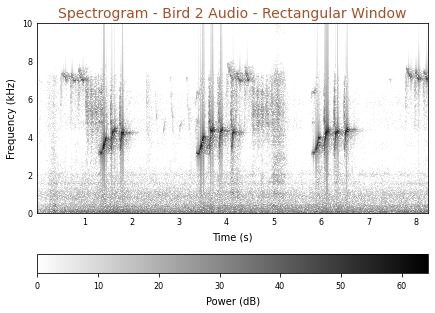

In [18]:
window = signal.boxcar(win_size)

plot_disc_signal(s_disc, 'Discrete Input Signal')
plot_window(window, win_size, 'Rectangular Window')

for i in range(0, s_disc.size):
    s_disc[i] = s_disc[i] * window[i]
            
plot_disc_signal(s_disc, title='Resulting Signal: Rectangular')
plot_spec_scipy(bird2_path, title='Spectrogram - Bird 2 Audio - Rectangular Window', window='boxcar')

**Hanning Window:** This is a bell shaped window which multiplies the input signal by a decreasing value as the samples get closer to the edges. This has the effect of attenuating the signal near the edges while keeping much of its data nearer to the centre.


<ipython-input-8-d62e69fc9ebc>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read(path)


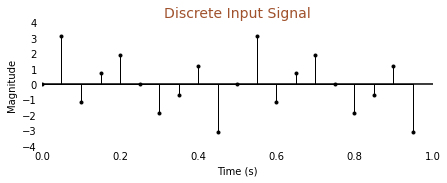

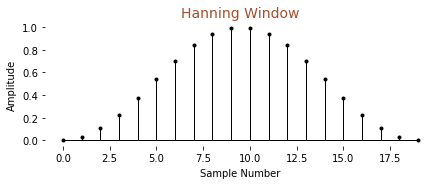

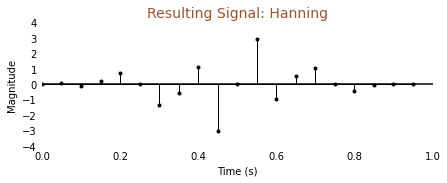

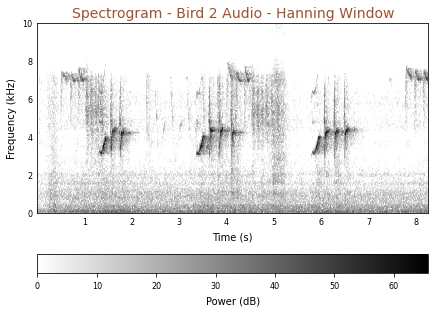

In [19]:
window = signal.hann(win_size)

plot_disc_signal(s_disc, 'Discrete Input Signal')
plot_window(window, win_size, 'Hanning Window')

for i in range(0, s_disc.size):
    s_disc[i] = s_disc[i] * window[i]
            
plot_disc_signal(s_disc, title='Resulting Signal: Hanning')
plot_spec_scipy(bird2_path, title='Spectrogram - Bird 2 Audio - Hanning Window', window='hann')

**Blackman-Harris Window:** This is another bell shaped window but the cut-off of the curve is much steeper than the Hanning Window. This causes samples to be attenuated to a greater degree as they near the edges of the signal.

<ipython-input-8-d62e69fc9ebc>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read(path)


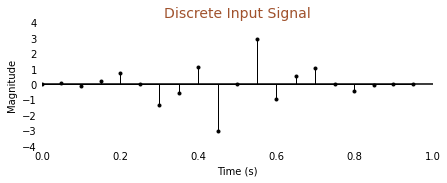

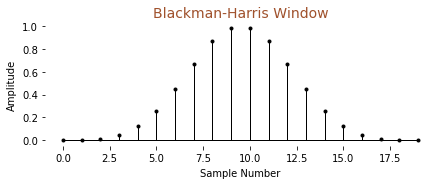

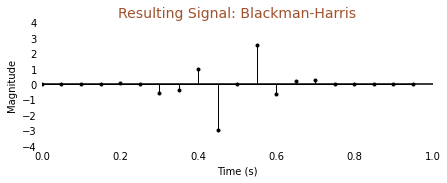

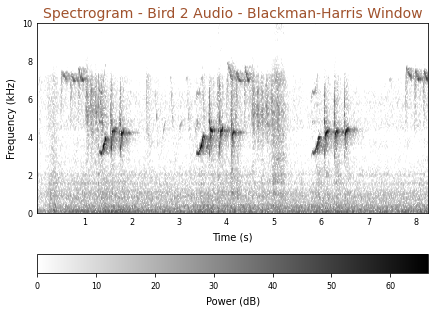

In [20]:
window = signal.blackmanharris(win_size)

plot_disc_signal(s_disc, 'Discrete Input Signal')
plot_window(window, win_size, 'Blackman-Harris Window')

for i in range(0, s_disc.size):
    s_disc[i] = s_disc[i] * window[i]
            
plot_disc_signal(s_disc, title='Resulting Signal: Blackman-Harris')
plot_spec_scipy(bird2_path, title='Spectrogram - Bird 2 Audio - Blackman-Harris Window', window='blackmanharris')

### Time/Frequency Tradeoff:

The choice of windowing function for the STFT is however not the only thing that can influence the spectrogram that is created. An important parameter to consider is also the width of the window that is chosen. Considering a window which focuses on a very narrow period in time, the spectrogram that results would have a very high resolution in the time domain, but how would this effect the resolution in the frequency domain? Given a sampling frequency $fs$, it is the case that a narrower window will result in less samples being taken of the signal in that window of time, which will result in a worse frequency resolution. The inverse of this is also true, a wider window will have a better frequency resolution, but will come at the cost of the resolution of the time domain [8]. 

This can be seen by comparing the spectrograms below:

<ipython-input-8-d62e69fc9ebc>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read(path)


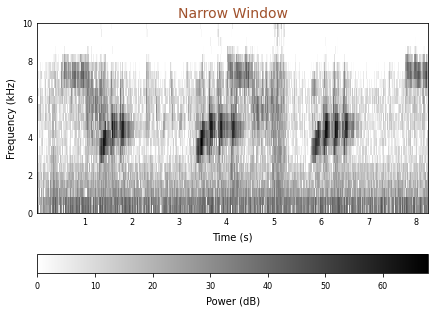

In [21]:
plot_spec_scipy(bird2_path, title='Narrow Window', window='hanning', nperseg=100, overlap=10)

<ipython-input-8-d62e69fc9ebc>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read(path)


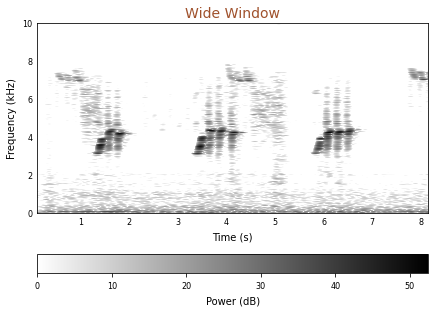

In [22]:
plot_spec_scipy(bird2_path, title='Wide Window', window='hanning', nperseg=10000, overlap=100)

<ipython-input-8-d62e69fc9ebc>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read(path)


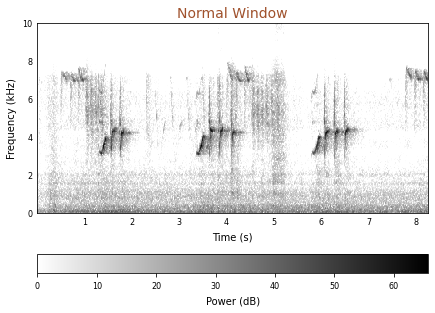

In [23]:
plot_spec_scipy(bird2_path, title='Normal Window', window='hanning', nperseg=1024, overlap=100)

## Conclusion:

As was established previously, a human listener may find it very difficult to identify the finer qualities of a birdsong based solely on what is heard. Based on what was presented in this report, it would be reasonable to conclude that the information contained within spectrograms, combined with the readability of that information, makes them a very powerful tool that may be used to provide a birder with information they may otherwise be unaware of. 

The processeses that are used to create a spectrogram rely on a fundamental property of signals, that is the fact that all signals are nothing more than the summation of simple sinusoids of varying frequency and phase. The Discrete Fourier Transform makes it possible to decompose any signal into its component sinusoids, thereby revealing the frequencies that make up a signal. As was discussed however, in order to use the DFT to create a spectrogram, it is necessary to first segment the signal being analysed into small periods of time before they are processed, thereby allowing the information to be represented in both time and frequency domains. This procedure is exactly what is taking place with the Short Time Fourier Transform. 

## References:

[1] - Merriam-webster.com. 2021 Definition of Signal. [online] Available at: <https://www.merriam-webster.com/dictionary/signal> [Accessed 20 March 2021].

[2] - Bevelacqua, P., n.d. Fourier Transform. [online] Thefouriertransform.com. Available at: <https://www.thefouriertransform.com/> [Accessed 25 March 2021].

[3] - Sibley Guides. 2012. Pitch, and bird song identification - Sibley Guides. [online] Available at: <https://www.sibleyguides.com/bird-info/the-basics-of-identifying-bird-sounds/pitch-and-bird-song-identification/> [Accessed 25 March 2021].

[4] - Lyons, R., 2011. Understanding digital signal processing. 3rd ed. Upper Saddle River, N.J: Prentice Hall. 

[5] - Pacific Northwest Seismic Network. 2016. What is a Spectrogram?. [online] Available at: <https://pnsn.org/spectrograms/what-is-a-spectrogram> [Accessed 30 March 2021].

[6] - Soundbirding.org. 2016. Sound and Spectrograms. [online] Available at: <http://soundbirding.org/index.php/sound-and-spectrograms/> [Accessed 30 March 2021].

[7] - Jones, D., 2014. Digital Signal Processing: A User’s Guide. 2nd ed. Rice University, Houston, Texas: Douglas L. Jones.

[8] - Kehtarnavaz, N., Namjin, K. and Qingzhong, P., 2008. Digital signal processing system design. 2nd ed. Amsterdam: Elsevier.